In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('surprise.xlsx')

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [4]:
df.head()

Titre de la page et classe de l'écran    Vues  Utilisateurs  \
0  أخبار المغرب – آخر اخبار المملكة المغربية اليو...  162073         48895   
1  أخبار المغرب – اخبار المملكة المغربية اليوم أو...   72510         12123   
2  خريطة المغرب 2023 - خريطة المملكة المغربية الر...   51606         42010   
3                                  24 ساعة - Maroc24   15752          2983   
4  مواقيت الصلاة المغرب 2023 - مواقيت الصلاة الرس...   13319          9324   

   Vues par utilisateur  Durée d'engagement moyenne  Nombre d'événements  \
0              3.314715                  105.292504               465066   
1              5.981193                  171.814897               190352   
2              1.228422                   40.178243               173111   
3              5.280590                  129.405297                33760   
4              1.428464                   29.584728                43479   

        type_news  
0     اخبار_وطنية  
1     اخبار_وطنية  
2  المغرب-العالمي  
3     اخبار_وطنية  
4         regions

In [5]:
# عرض الفئات الفريدة من 'type_news'
print(df['type_news'].unique())

['اخبار_وطنية' 'المغرب-العالمي' 'regions' 'economie' 'politique'
 'art-et-culture' 'صحة']


In [6]:
# تحويل الفئات النصية إلى ترميز واحد-الساخن
categories = np.unique(np.append(df['type_news'].unique(), 'اخبار_وطنية'))
encoder = OneHotEncoder(categories=[categories])
type_news_encoded = encoder.fit_transform(df[['type_news']]).toarray()

In [7]:
# استخدام TF-IDF لتحويل 'Titre de la page et classe de l'écran' إلى مصفوفة TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500)
titre_tfidf = tfidf_vectorizer.fit_transform(df['Titre de la page et classe de l\'écran']).toarray()

In [8]:
X = np.concatenate((titre_tfidf, type_news_encoded), axis=1)
y_vues = df['Vues'].values
y_users = df['Utilisateurs'].values  # تأكد من وجود عمود 'Utilisateurs' في ملف Excel

In [9]:
# 2. تقسيم البيانات إلى مجموعات التدريب والاختبار
X_train, X_test, y_train_vues, y_test_vues = train_test_split(X, y_vues, test_size=0.2, random_state=42)
X_train, X_test, y_train_users, y_test_users = train_test_split(X, y_users, test_size=0.2, random_state=42)
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (4000, 507)
Shape of test set: (1000, 507)


# KNeighborsRegressor 

In [10]:
KNR = KNeighborsRegressor()
KNR.fit(X_train, y_train_vues)
y_pred_test_vues2 = KNR.predict(X_test)

In [11]:
    mse_test_vues2 = mean_squared_error(y_test_vues, y_pred_test_vues2)
    mae_test_vues2 = mean_absolute_error(y_test_vues, y_pred_test_vues2)
    r2_test_vues2 = r2_score(y_test_vues, y_pred_test_vues2)

In [12]:
print(mse_test_vues2)
print(mae_test_vues2)
print(r2_test_vues2)

198305.36176
143.6068
0.22136710815876104


# Random Forests Regresso

In [13]:
rfc = RandomForestRegressor(n_estimators=300)
rfc.fit(X_train, y_train_vues)
predictions3 = rfc.predict(X_test)

In [14]:
    mse_test_vues3 = mean_squared_error(y_test_vues,predictions3)
    mae_test_vues3 = mean_absolute_error(y_test_vues,predictions3)
    r2_test_vues3 = r2_score(y_test_vues, predictions3)

In [15]:
print(mse_test_vues3)
print(mae_test_vues3)
print(r2_test_vues3)

320173.9300244236
137.415931619432
-0.25714176769867403


# DecisionTreeRegressor

In [16]:
dt= DecisionTreeRegressor(random_state=0)

dt.fit(X_train,  y_train_vues)
predictions4 = dt.predict(X_test)

In [17]:
    mse_test_vues4 = mean_squared_error(y_test_vues, predictions4)
    mae_test_vues4 = mean_absolute_error(y_test_vues, predictions4)
    r2_test_vues4 = r2_score(y_test_vues, predictions4)

In [18]:
print(mse_test_vues4)
print(mae_test_vues4)
print(r2_test_vues4)

288632.04072917614
124.50710730603329
-0.13329462479681942


# Support Vector Machines (SVM)

In [19]:
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train, y_train_vues)
predictions5 = svr_model.predict(X_test)

In [20]:
    mse_test_vues5 = mean_squared_error(y_test_vues, predictions5)
    mae_test_vues5 = mean_absolute_error(y_test_vues, predictions5)
    r2_test_vues5 = r2_score(y_test_vues, predictions5)

In [21]:
print(mse_test_vues5)
print(mae_test_vues5)
print(r2_test_vues5)

262224.7212321077
108.97069557211744
-0.029608030731537616


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [23]:
sequential_model = Sequential()
sequential_model.add(Flatten(input_shape=(X_train.shape[1],)))
sequential_model.add(Dense(128, activation='relu'))
sequential_model.add(Dense(1, activation='linear'))

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
sequential_model.compile(optimizer='adam', 
                         loss='mean_squared_error', 
                         metrics=['mean_absolute_error'])

In [26]:
sequential_model.fit(X_train, y_train_vues, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9091792.0000 - mean_absolute_error: 201.3756
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2575973.5000 - mean_absolute_error: 146.9217
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7433389.0000 - mean_absolute_error: 171.9475
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5125378.5000 - mean_absolute_error: 146.3045
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19508586.0000 - mean_absolute_error: 251.9942
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2026734.3750 - mean_absolute_error: 111.5443
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3915486.0000 - mean_absolute_error: 151.3692
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5324608.5000 - mean_absolute_error: 162.4994
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1207620.7500 - mean_absolute_error: 136.9692
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [28]:
y_pred_sequential = sequential_model.predict(X_test)
mse_sequential = mean_squared_error(y_test_vues, y_pred_sequential)
mae_sequential = mean_absolute_error(y_test_vues, y_pred_sequential)
r2_sequential = r2_score(y_test_vues, y_pred_sequential)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
print(mse_sequential)
print(mae_sequential)
print(r2_sequential)

253416.54529722323
124.64059107208251
0.004976689717553495


# Résultats finaux

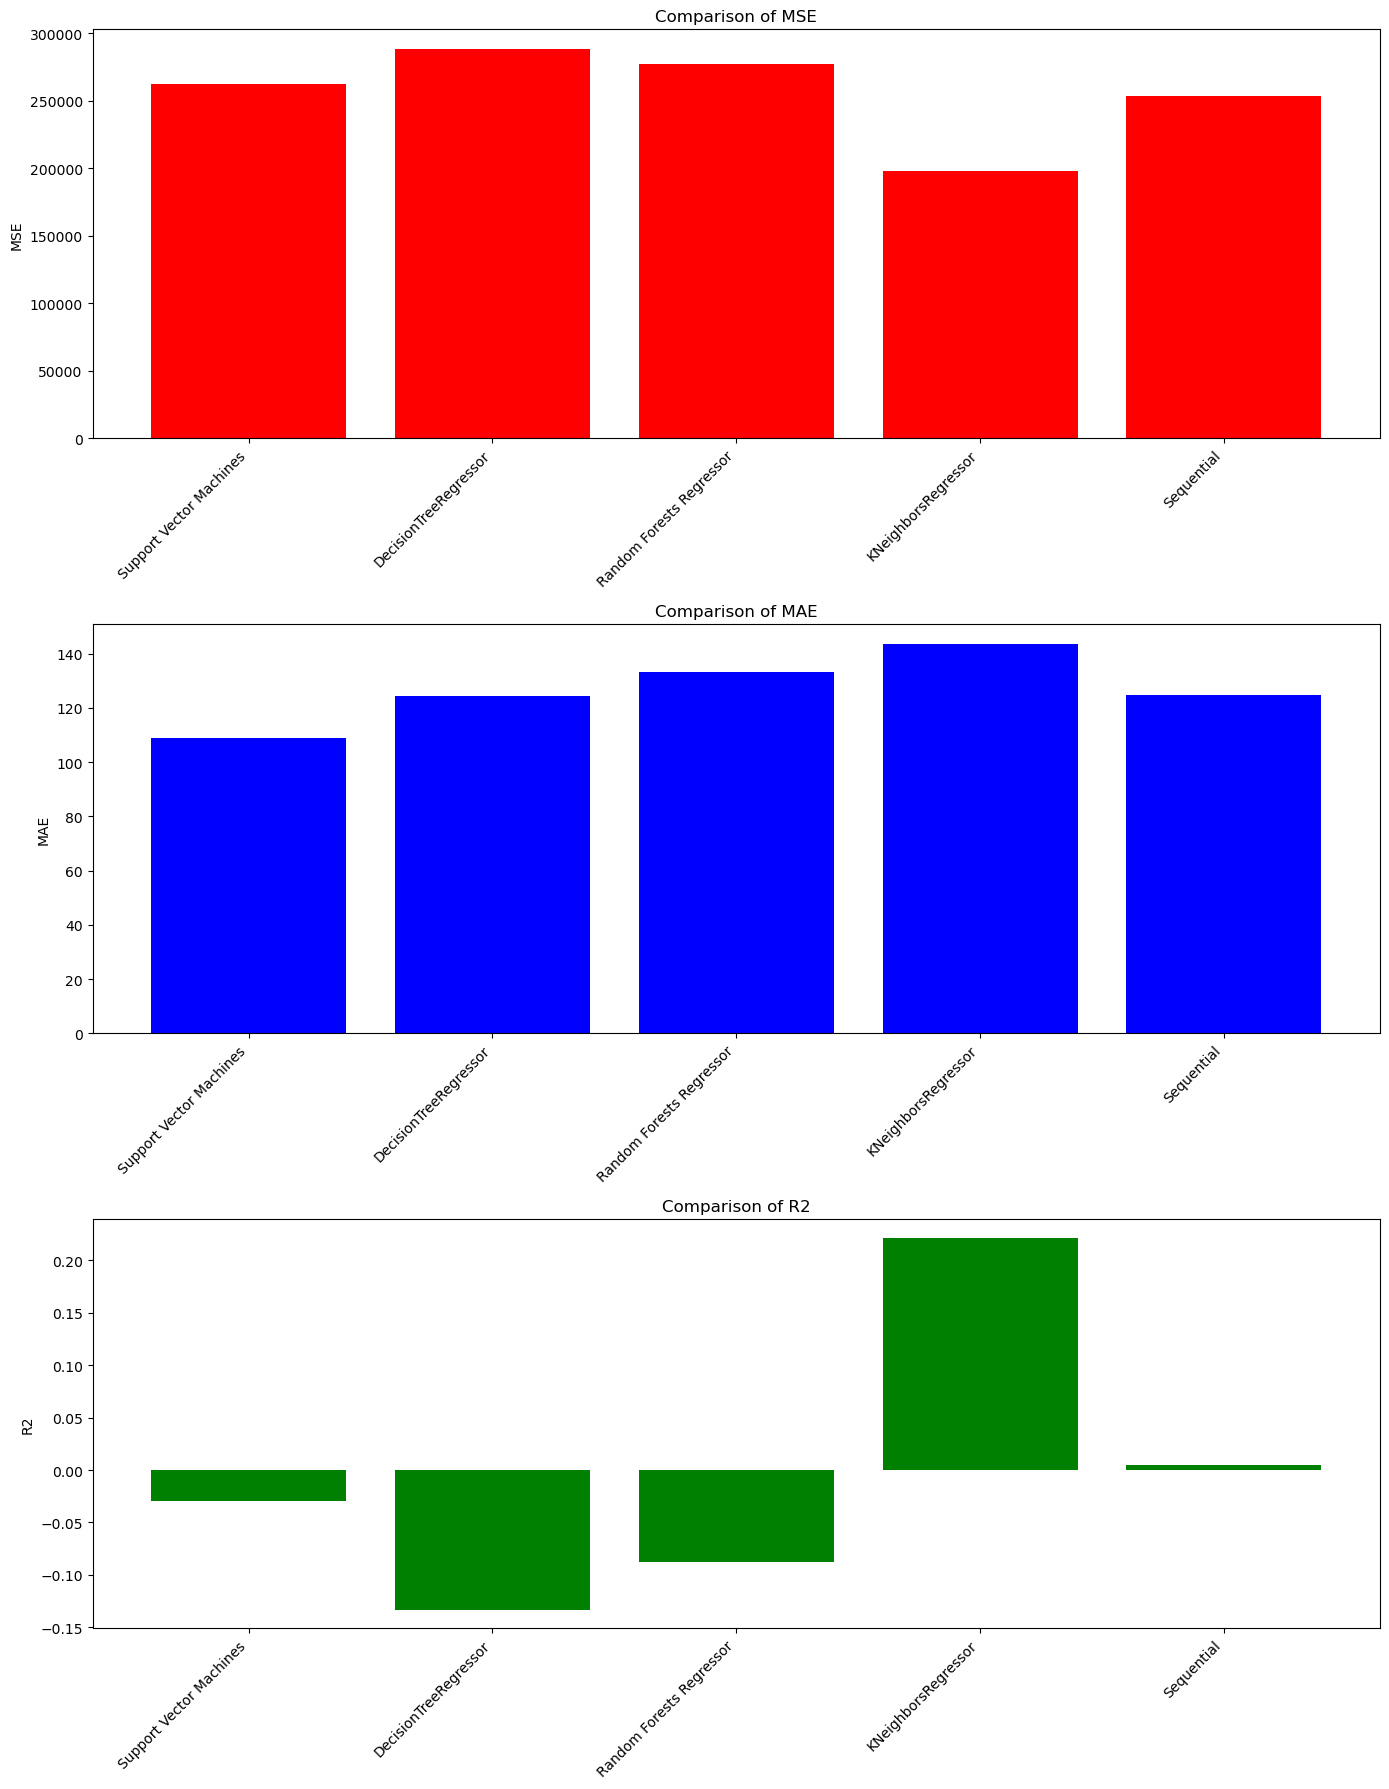

In [31]:
# القيم المأخوذة من النتائج التي قدمتها
models = ['Support Vector Machines', 'DecisionTreeRegressor', 'Random Forests Regressor', 'KNeighborsRegressor','Sequential']
mse_values = [262224.7212321077, 288632.04072917614, 277030.2899448746, 198305.36176,253416.54529722323]
mae_values = [108.97069557211744, 124.50710730603329, 133.269987042827, 143.6068,124.64059107208251]
r2_values = [-0.029608030731537616, -0.13329462479681942, -0.08774111740081181, 0.22136710815876104,0.004976689717553495]

x = np.arange(len(models))  # عدد النماذج

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 18))

# رسم MSE
ax1.bar(x, mse_values, color='red')
ax1.set_ylabel('MSE')
ax1.set_title('Comparison of MSE')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha="right")

# رسم MAE
ax2.bar(x, mae_values, color='blue')
ax2.set_ylabel('MAE')
ax2.set_title('Comparison of MAE')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha="right")

# رسم R2
ax3.bar(x, r2_values, color='green')
ax3.set_ylabel('R2')
ax3.set_title('Comparison of R2')
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45, ha="right")

plt.tight_layout()
plt.show()


# Interprétation :